# Modelle der Informatik - Kapitel 6: Machine Learning
## Übungsblatt 1: Lineare Regression

###Notwendige Voraussetzungen: Definitionen


**1.   Was bedeutet starke bzw. schwache KI?**


**2.   Was bedeutet Machine Learning?**


**3.   Welche Arten von Machine Learning unterscheiden wir?**


**4. Was beschreibt die Aufgabe (Task) und was gibt die Performancemetrik im Machine Learning an? Wie hängen diese beiden Begriffe zusammen?**

**5.  Was muss mit erhobenen Daten passieren, damit sie zum Training von Machine Learning Modellen verwendet werden können?**


**6.   Werden immer alle Daten eines Datensets während des Trainings eines Modells verwendet?**


**7. Was ist der Vorteil oder Nachteil ein Datenset in Test- und Trainingsdaten zu unterteilen?**

### Daten laden

In diesem Abschnitt werden alle Daten und Pakete geladen, die Sie für dieses Übungsblatt benötigen.

In [8]:
import sklearn
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Aufgabe 1: Lineare Regression

In dieser Aufgabe sollen Hauspreise in Boston geschätzt/vorhergesagt werden. Dazu wurden aus einer umfangreichen Studie bereits wichtige Merkmale (Features) extrahiert und in eine geeignete Form für weitere Berechnungen gebracht (Transformation in den Feature-Space). Im Folgenden finden Sie eine Beschreibung aller Features (Attribute) die berücksichtigt werden:

| Feature Name | Beschreibung                                                                      |
|--------------|:-----------------------------------------------------------------------------------:|
| NOX          | Stickstoffoxidkonzentration der Luft (Partikel pro 10 Millionen)                  |
| INDUS        | Anteil nicht Einzelhandelsflächen (Wirtschaftlich genutzte Räume)                                               |
| RM           | Durchschnittliche Anzahl Räume pro Wohnung                                        |
| CHAS         | Charles River Dummy-Variable (1 wenn das Wohngebiet an den Fluss grenzt, 0 sonst) |
| TAX          | Grundsteuersatz pro 10,000$                                                       |

### Vorverarbeitung und Train-Test-Split der Daten

In einem Vorverarbeitungsschritt werden alle Daten normalisiert, d.h. auf eine einheitliche Skala gebracht. Dies erlaubt es uns die Bedeutung einzelner Features direkt miteinander zu vergleichen.

Das Datenset wird in 80% Trainingsdaten und 20% Testdaten aufgeteilt.

In [9]:
boston = datasets.load_boston()
data=pd.DataFrame(boston.data,columns=boston.feature_names)
features = [2, 3, 4, 5, 9]
feature_names = boston.feature_names[features]
X = boston.data[:, features]
y = boston.target
#split dataset into test and train datasets
X_norm = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)


C:\Users\jonas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

### Daten graphisch anzeigen

In diesem Abschnitt hast du die Möglichkeit jedes Feature/Attribute im Zusammenhang mit den Hauspreisen zu visualisieren. Wähle dazu den Namen des gewünschten Features rechts aus der Liste aus und führe die  Zelle erneut aus.

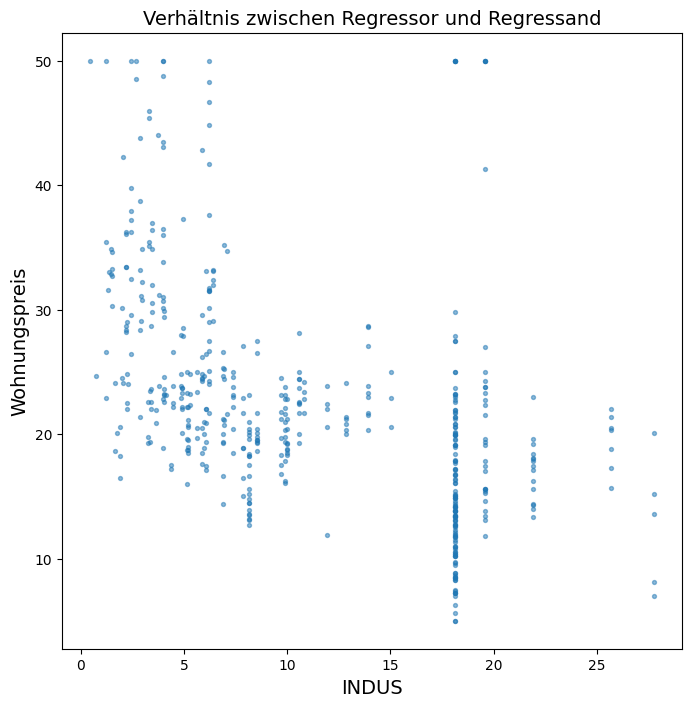

In [10]:
#@title Plot Features
selected_feature = "INDUS" #@param ["NOX", "RM", "CHAS", "TAX", "INDUS"]
if selected_feature not in data.columns:
  raise Exception( "Please enter a valid feature name")
  
x=data[selected_feature]

plt.figure(figsize=(8,8))
plt.scatter(x,y,alpha=.5,s=8)
plt.xlabel(x.name, fontsize=14)
plt.ylabel('Wohnungspreis', fontsize=14)
plt.title('Verhältnis zwischen Regressor und Regressand', fontsize=14)
plt.show()
  


### Modell Training





**Aufgabe: Was bedeutet Under- bzw. Overfitting?**



[ANTWORT]...

Im Folgenden werden die Paramter einer Regressionsgerade gelernt, welche die Daten optimal beschreibt: 

In [11]:
ones = np.ones(shape=y_train.shape)[..., None]
X_aug = np.concatenate((ones, X_train), 1)
w = np.linalg.inv(X_aug.transpose().dot(X_aug)).dot(X_aug.transpose()).dot(y_train)

feature_names_aug = np.insert(feature_names, 0, 'Bias')
w = pd.DataFrame({'coeffs':w}, index=feature_names_aug)
w

,coeffs
Bias,22.499196
INDUS,-0.122212
CHAS,1.296067
NOX,-0.974770
RM,5.517137
TAX,-2.029113


**Aufgabe: Welche Bedeutung haben die Zahlen neben den  Features?**

[ANTWORT]...

**Aufgabe: Welches Feature hat den größten/kleinsten Einfluss?**

[ANTWORT]...

Im folgenden wollen wir für ein Haus mit den folgenden Eigenschaften den Preis vorhersagen:

|feature   |  wert (skaliert)      |
|-----------|:---------------:|
| INDUS|  0.12  |
| CHAS| -0.27|
| NOX   |    0.16   |
| RM     |   0.44    |
| TAX    | -0.80 |

**Berechnen Sie den Datenpunkt, notieren Sie dafür Rechnung und Ergebnis:**



[ANTWORT]...

Nach dem Training berechnen wir die Performance auf dem Training- und Test-Set. Dazu berechnen wir den Mean Squared Error (MSE) sowie dessen Wurzel den Root Mean Squared Error (RMSE).

In [12]:
from sklearn import metrics

factors=w.values[1:].reshape(-1)
bias=w.values[0]
y_pred_train=np.dot(X_train,factors)+bias
y_pred_test=np.dot(X_test,factors)+bias

# Abweichung predicted zu true value
print("MSE Loss: train={:.2f} test={:.2f}".format(metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)))
print("RMSE Loss train={:.2f} test={:.2f}".format(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))))

MSE Loss: train=34.69 test=38.60
RMSE Loss train=5.89 test=6.21


###Regularisierung

Im Folgenden versuchen wir die Generalisierbarkeit unseres Modells, mithilfe einer geeigneten Regularisierung, zu verbessern (kleinerer Fehler im Test-Set). 

Dazu wird nun, die aus der Vorlesung bekannte, modifizierte Kostenfunktion optimiert: 

$
L\left(\omega\right) = \frac{1}{m}\sum_{i}^{m} \left(f\left(x\right)-y\right)_{i}^{2} + \gamma \sum_{j}^{p}|\omega_{j}|
$

###Fragen

**1.   Wozu führen die hinzugefügten Kosten?
Welche Aufgabe hat der Parameter 𝛾?
**

**2. Jetzt sollen Sie mit der Regularisierung experimentieren. Stellen Sie dafür verschiedene Gamma-Werte ein und beschreiben Sie Ihre Beobachtungen. Wie werden die Features gewichtet, wie verhalten sich MSE und RMSE?**



In [13]:
#@title Gamma-Wert auswählen
gamma = 0.2 #@param {type:"slider", min:0, max:1, step:0.1}
from sklearn import linear_model
reg = linear_model.Lasso(gamma)
reg.fit(X_train, y_train)



w = pd.DataFrame({'coeffs':reg.coef_}, index=feature_names)
print(w)


print("MSE Loss: train={:.2f} test={:.2f}".format(metrics.mean_squared_error(reg.predict(X_train), y_train), metrics.mean_squared_error(reg.predict(X_test), y_test)))
print("RMSE Loss: train={:.2f} test={:.2f}".format(np.sqrt(metrics.mean_squared_error(reg.predict(X_train), y_train)), np.sqrt(metrics.mean_squared_error(reg.predict(X_test), y_test))))

         coeffs
INDUS -0.091158
CHAS   1.094815
NOX   -0.855849
RM     5.412224
TAX   -1.953769
MSE Loss: train=34.80 test=38.06
RMSE Loss: train=5.90 test=6.17


Diese Form der Regularisierung wird auch Lasso Regression genannt und eignet sich besonders in Fällen, in denen sehr viele Features vorhanden sind (insbesondere wenn gilt #Features > #Datenpunkte).